<a href="https://colab.research.google.com/github/SL6I/MLProject/blob/main/Linear_Reggression_House_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data = pd.read_csv('housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True) # Drop the null rows

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis = 1)
y = data[
    'median_house_value'
]



In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2)

In [ ]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

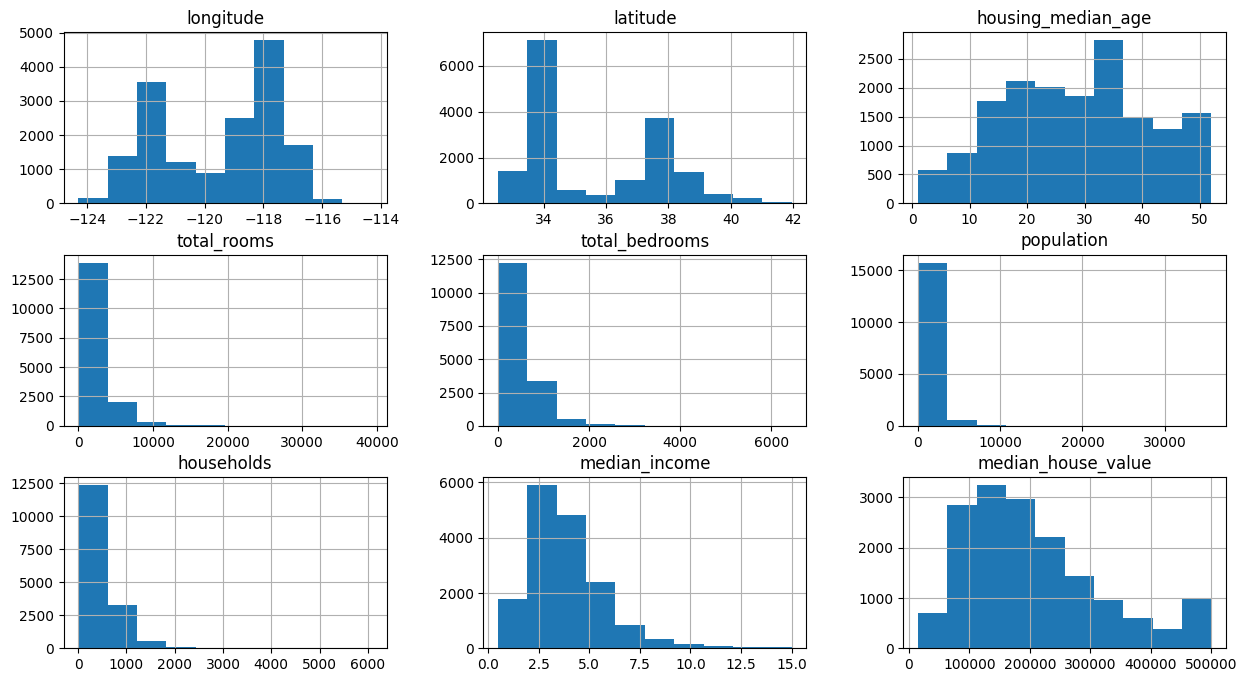

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.corr()

<ipython-input-17-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924956,-0.111620,0.043887,0.068600,0.101234,0.056428,-0.012594,-0.046739
latitude,-0.924956,1.000000,0.015230,-0.034965,-0.066089,-0.108721,-0.071468,-0.081949,-0.143151
housing_median_age,-0.111620,0.015230,1.000000,-0.362710,-0.323270,-0.296854,-0.305030,-0.118819,0.110556
total_rooms,0.043887,-0.034965,-0.362710,1.000000,0.930865,0.857303,0.920956,0.200560,0.131240
total_bedrooms,0.068600,-0.066089,-0.323270,0.930865,1.000000,0.877310,0.980128,-0.005395,0.048365
population,0.101234,-0.108721,-0.296854,0.857303,0.877310,1.000000,0.906057,0.008335,-0.025452
households,0.056428,-0.071468,-0.305030,0.920956,0.980128,0.906057,1.000000,0.017119,0.064761
median_income,-0.012594,-0.081949,-0.118819,0.200560,-0.005395,0.008335,0.017119,1.000000,0.686525
median_house_value,-0.046739,-0.143151,0.110556,0.131240,0.048365,-0.025452,0.064761,0.686525,1.000000


<ipython-input-19-b4adc3bca8ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True,cmap = 'YlGnBu')


<Axes: >

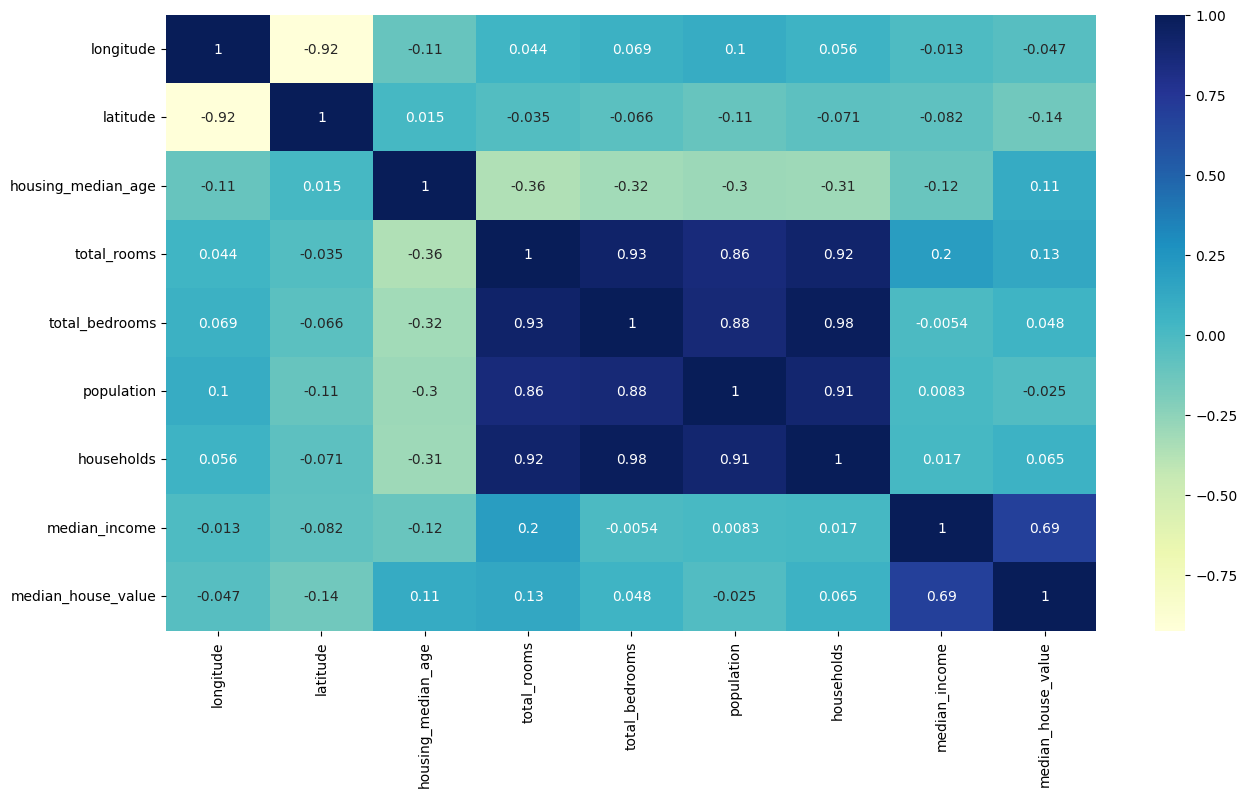

In [ ]:

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True,cmap = 'YlGnBu')

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

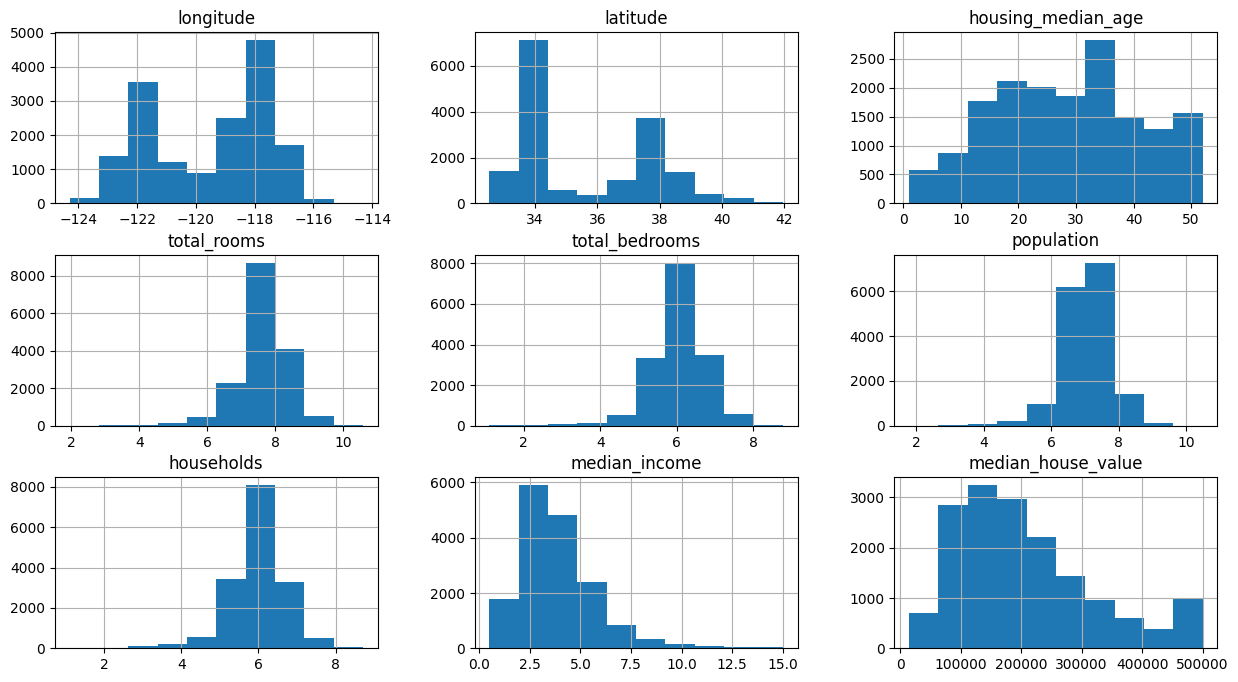

In [ ]:
train_data.hist(figsize=(15,8))

**# Data Preprocessing**

In [ ]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     7197
INLAND        5224
NEAR OCEAN    2111
NEAR BAY      1811
ISLAND           3
Name: ocean_proximity, dtype: int64

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'],axis = 1)

<Axes: >

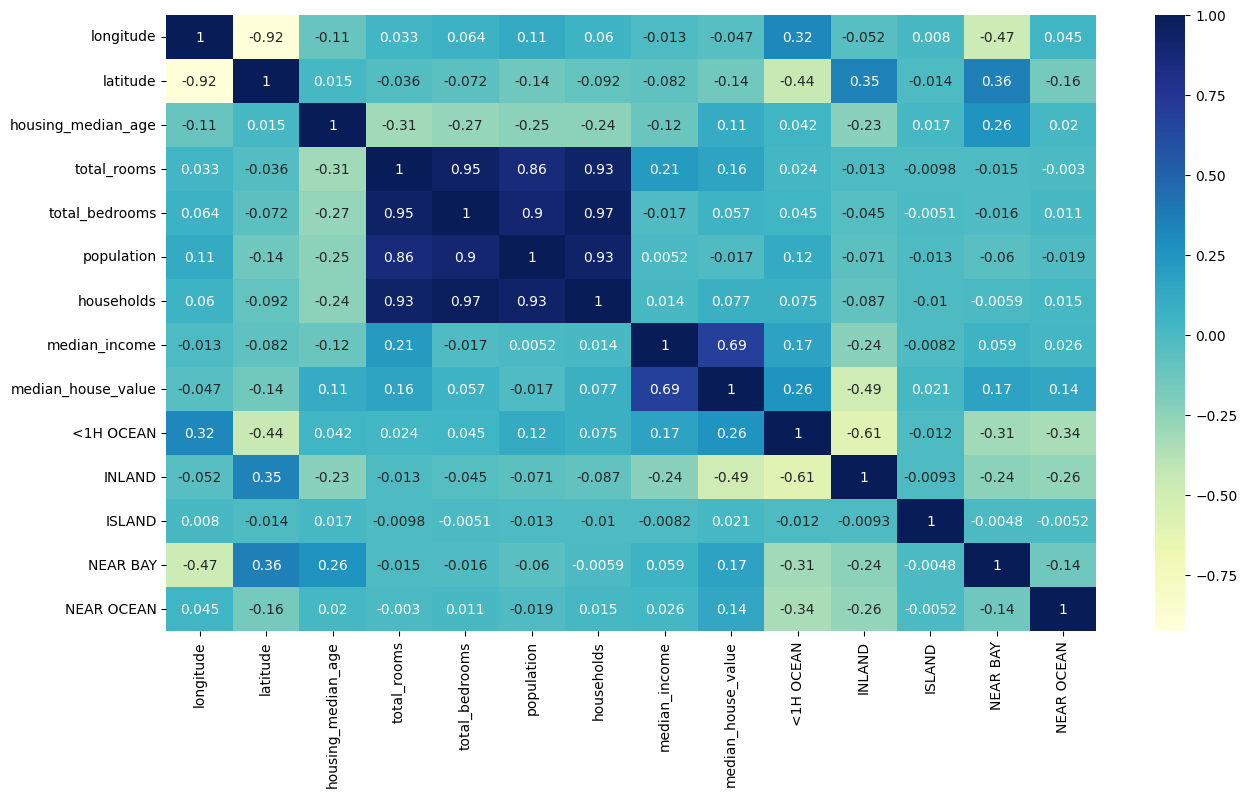

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True,cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

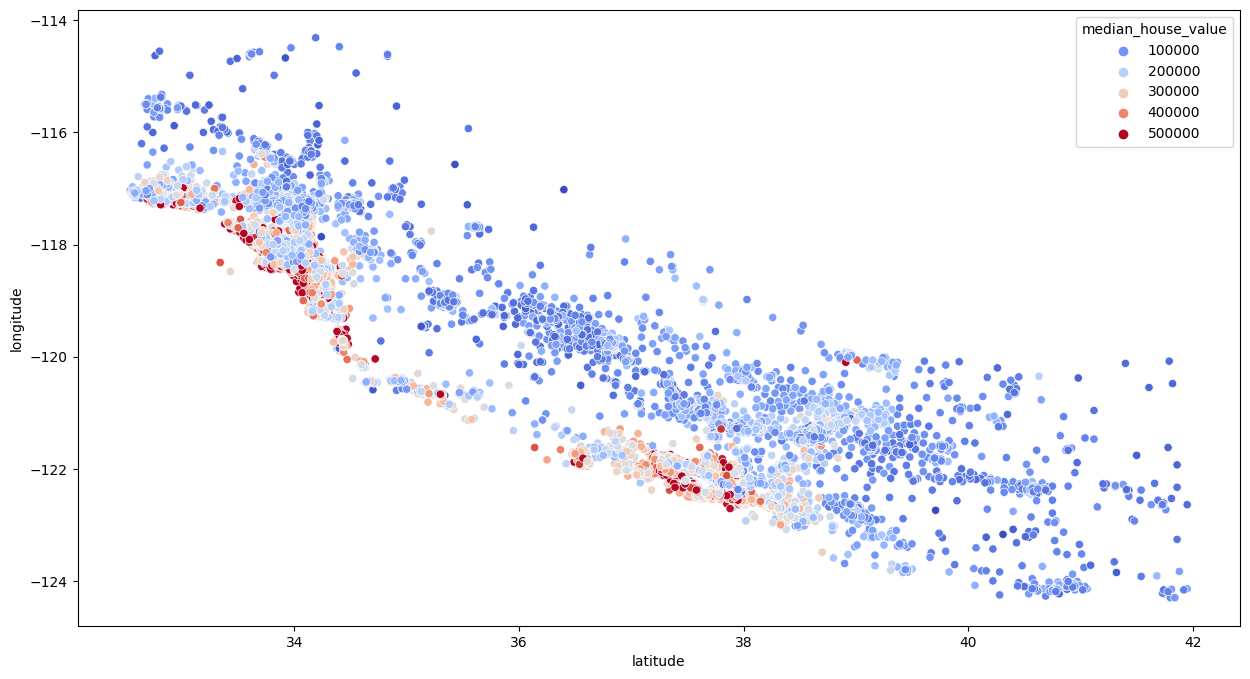

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'latitude', y = 'longitude',data = train_data,hue='median_house_value',palette = 'coolwarm')